In [1]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Important necessary libraries

import numpy as np,pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Import necessary libraries or packages for modelling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

In [3]:
pd.set_option('display.max_columns',None) # Shows all columns
pd.set_option('display.max_rows',None) # shows all rows

In [4]:
lead_score=pd.read_csv(r"D:\Data Science\Data Analytics\Upgrad\Machine Learning 1\Lead Score Case Study\Lead Scoring_Sam\Lead Scoring Assignment/Leads.csv")
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Checking the basic info and datatypes
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Checking the shape
lead_score.shape

(9240, 37)

In [7]:
# Check for summary
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 1. Data Cleaning

In [8]:
# Dropping the system/sales generated columns 'Tags','Lead Quality','Last Notable Activity','Last Activity'
# There are some columns being generated by Sales team. Once a Sales team member completes the call with the student, these 
# information is generated but we need to drop all these columns since these will not be available at the time of running
# our model

lead_score.drop(['Tags','Last Notable Activity','Last Activity'], axis = 1, inplace = True)

In [9]:
# Dropping 'Prospect ID' and 'Lead Number' as they have unique values and so they are of no use in analysis

lead_score.drop(['Prospect ID','Lead Number'], axis = 1, inplace = True)

In [10]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Country                                        6779 non-null   object 
 9   Specialization                                 7802 

In [11]:
# Checking value counts in individual categorical variables

column=['Lead Origin','Lead Source','Do Not Email','Do Not Call','Country','Specialization','How did you hear about X Education',
        'What is your current occupation','What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
        'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
        'Lead Quality','Update me on Supply Chain Content','Get updates on DM Content','Lead Profile','City','Asymmetrique Activity Index',
        'Asymmetrique Profile Index','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

for i in column:
    print(lead_score[i].astype('category').value_counts())
    print('=================')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
welearnblog_Home        1
NC_EDM                  1
WeLearn                 1
blog                    1
testone                 1
youtubechannel          1
Name: Lead Source, dtype: int64
No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
S

- If we carefully analyse the values from above result, we see that certain variables has 'Select' as one of the options. This value ideally indicates that the students have not made any selections and in that case, we need to replace those fields with 'NAN' so that it does not effects the %age

In [12]:
# Replacing 'Select' with 'NAN'

col1=['Specialization','How did you hear about X Education','Lead Profile','City']

for i in col1:
    lead_score[i].replace('Select', np.NaN, inplace=True)

In [13]:
# Checking percentage of missing values in each column
round(100*(lead_score.isnull().sum()/len(lead_score)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

### Dropping the columns where %age of NULL value is >45 %

In [14]:
# Dropping the columns with Null values >45%
drop_null=lead_score.columns[round(100*(lead_score.isnull().sum()/len(lead_score)),2)>45]

lead_score=lead_score.drop(drop_null,axis=1)

In [15]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Country                                        6779 non-null   object 
 9   Specialization                                 5860 

### Now let's start finding the skewed data in categorical columns.

In [16]:
# Storing categorical columns in a separate 'col2' and did iteration to find the %age of value counts
col2=['Lead Origin','Lead Source','Do Not Email','Do Not Call','Country','Specialization','What is your current occupation',
       'What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
        'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses'
        ,'Update me on Supply Chain Content','Get updates on DM Content','City','I agree to pay the amount through cheque',
        'A free copy of Mastering The Interview']
       
for i in col2:
      print(lead_score[i].value_counts(normalize=True))
      print('================================')

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Social Media         0.000217
Live Chat            0.000217
Press_Release        0.000217
Pay per Click Ads    0.000109
testone              0.000109
blog                 0.000109
NC_EDM               0.000109
welearnblog_Home     0.000109
youtubechannel       0.000109
WeLearn              0.000109
Name: Lead Source, dtype: float64
No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64
No     0.999784
Yes    0.000216
Name: Do Not Call, dtyp

### We can observe that there are many columns which are highly skewed. Let's drop those columns as it will not help in analysis

In [17]:
# Dropping columns where the %age of one field value is more than 90% namely 'Do Not Email'(92%),'Do Not Call'(99%),
# 'Country'(99%),'What matters most to you in choosing a course'(99%),'Search'(99%),'Newspaper Article'(99%),'X Education Forums' (99%),
# 'Newspaper'(99%),'Digital Advertisement'(99%),'Through Recommendations'(99%),'Receive More Updates About Our Courses'(100%),
#'Update me on Supply Chain Content'(100%),'Get updates on DM Content'(100%),'I agree to pay the amount through cheque'(100%),
#'A free copy of Mastering The Interview'(100%),'Magazine'(100%)

lead_score.drop(['Do Not Email','Do Not Call','Country','What matters most to you in choosing a course','Search',
                 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                 'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
                 'I agree to pay the amount through cheque','A free copy of Mastering The Interview','Magazine'],
                axis = 1, inplace = True)


In [18]:
# Combine categories where the %age is too low
# Combining variable in 'Lead Source' column having less than 5% and store it in a variable named as 'other'
lead_score['Lead Source'].replace(['Welingak Website','Referral Sites','Facebook','bing','google','Click2call','Social Media',
                                   'Press_Release','Live Chat','Pay per Click Ads','WeLearn','blog','NC_EDM','youtubechannel',
                                   'testone','welearnblog_Home'],'other',inplace=True)

# Combining variable in 'Specialization' column having less than 5% and store it in a variable named as 'other'
lead_score['Specialization'].replace(['Travel and Tourism','Media and Advertising','International Business','Healthcare Management'
                                     ,'Hospitality Management','E-COMMERCE','Retail Management','Rural and Agribusiness','E-Business',
                                      'Services Excellence'],
                                    'other',inplace=True)

# Combining variable in 'What is your current occupation' column having less than 85% and store it in a variable named as 'other'
lead_score['What is your current occupation'].replace(['Working Professional','Student','Other','Housewife','Businessman'],
                                                      'other',inplace=True)


In [19]:
# Filling the missing values in 'Lead Source', 'Speacialization','What is your current occupation','City' with a value named as 'unknown'
col3=['Lead Source','Specialization','What is your current occupation','City']

for i in col3:
    lead_score[i]=lead_score[i].fillna('unknown')

In [20]:
# Checking value counts once again in 'Lead Source','Specialization','What is your current occupation','City'

col4=['Lead Source','Specialization','What is your current occupation','City']

for i in col4:
    print(lead_score[i].value_counts(normalize=True))
    print('=====================================')


Google            0.310390
Direct Traffic    0.275216
Olark Chat        0.189935
Organic Search    0.124892
Reference         0.057792
other             0.037879
unknown           0.003896
Name: Lead Source, dtype: float64
unknown                              0.365801
other                                0.134091
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Name: Specialization, dtype: float64
Unemployed    0.606061
unknown       0.291126
other         0.102814
Name: What is your current occupation, dtype: float64
unknown                        0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.0742

In [21]:
# Rechecking lead_score info
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9240 non-null   object 
 2   Converted                        9240 non-null   int64  
 3   TotalVisits                      9103 non-null   float64
 4   Total Time Spent on Website      9240 non-null   int64  
 5   Page Views Per Visit             9103 non-null   float64
 6   Specialization                   9240 non-null   object 
 7   What is your current occupation  9240 non-null   object 
 8   City                             9240 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 649.8+ KB


In [22]:
# Let's check rows having greater than 70% NULL values

lead_score.drop(lead_score[lead_score.isnull().sum(axis = 1) > .7].index, axis = 0, inplace = True)

In [23]:
# Checking Shape
lead_score.shape

(9103, 9)

### Treating Null values of continuous variable

In [24]:
lead_score.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.362820
std,0.485464,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


### Since there are outliers in 'TotalVisits','Total Time Spent on Website','Page Views Per Visit', we will impute the Null values with the median value

In [25]:
# Checking for median of numerical columns 'TotalVisits','Total Time Spent on Website','Page Views Per Visit',

lead_score[['TotalVisits','Total Time Spent on Website','Page Views Per Visit',]].median()

TotalVisits                      3.0
Total Time Spent on Website    244.0
Page Views Per Visit             2.0
dtype: float64

In [26]:
# Impute median values for missing values for 'TotalVisits','Total Time Spent on Website','Page Views Per Visit' columns

lead_score['TotalVisits'].replace(to_replace = np.nan, value = 3.0, inplace = True)
lead_score['Total Time Spent on Website'].replace(to_replace = np.nan, value = 244.0, inplace = True)
lead_score['Page Views Per Visit'].replace(to_replace = np.nan, value = 2.0, inplace = True)

In [27]:
# Checking the data
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Converted                        9103 non-null   int64  
 3   TotalVisits                      9103 non-null   float64
 4   Total Time Spent on Website      9103 non-null   int64  
 5   Page Views Per Visit             9103 non-null   float64
 6   Specialization                   9103 non-null   object 
 7   What is your current occupation  9103 non-null   object 
 8   City                             9103 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 711.2+ KB


In [28]:
# Check for the % of rows which we had retained after dropping nulls

print(len(lead_score.index))
print(len(lead_score.index)/9240)

9103
0.9851731601731601


### 98% of records we have retained and it is good percentage to move to the next task

## 2. EDA

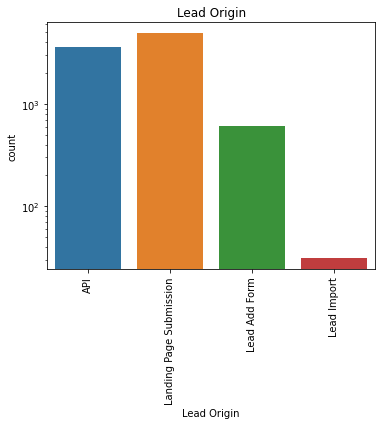

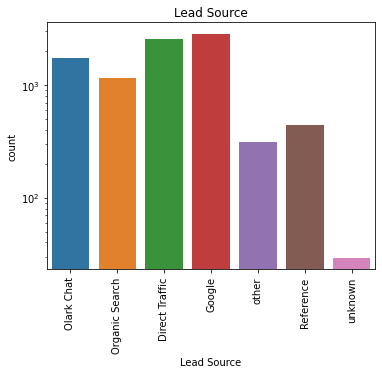

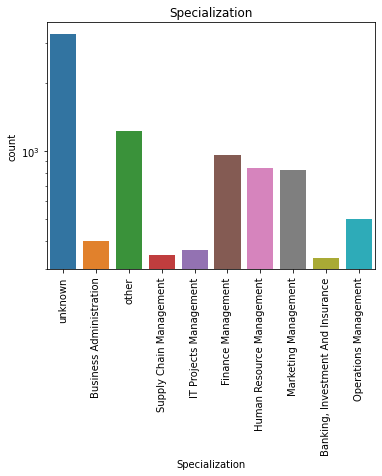

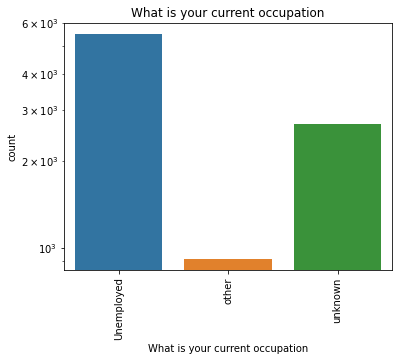

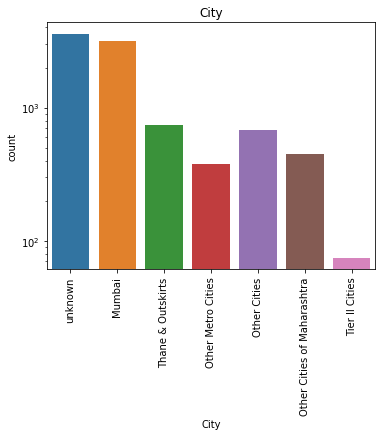

In [29]:
Matrix = ['Lead Origin','Lead Source','Specialization','What is your current occupation','City']
for i in enumerate(Matrix):
    plt.figure(figsize = (20,10))
    ax = plt.subplot(2,3, i[0]+1)
    sns.countplot(lead_score[i[1]])
    plt.yscale('log')
    plt.xticks(rotation=90)
    ax.set_title(i[1])

### a. In 'Lead Origin', the 'Landing Page Submission' is the highest
### b. In 'Lead Source', 'Google' has the highest source
### c. In 'Specialization', the 'unknown' value is the highest
### d. In 'What is your current occupation', 'Unemployed' is the highest
### e. In 'City', the lowest number of customer comes from 'Tier II Cities' and the 'unknown' value is the highest.

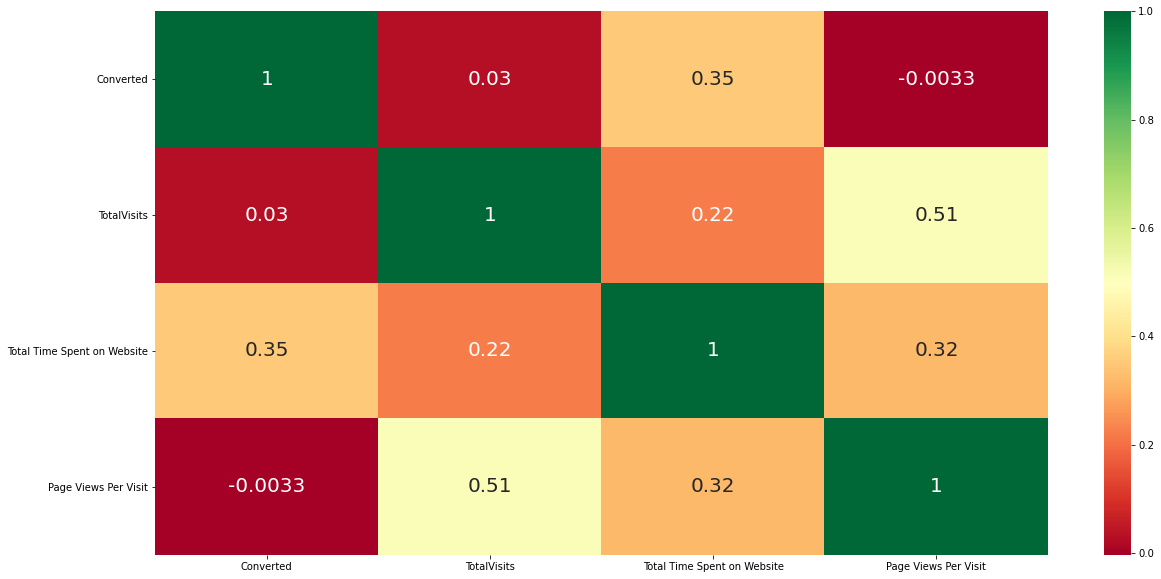

In [30]:
plt.figure(figsize = (20,10))
sns.heatmap(lead_score.corr(), annot = True, cmap="RdYlGn",annot_kws={"size":20})
plt.show()

### From thr Heat Map, we cannot see any significant relationship between the numerical variables but Total time Spent on Website and Converted has some relationship though it is not very strong. 
### Also out of TotalVisits made by the visitor, around 51% visitor have viewed the Page which may help in identifying potential lead which can be a Hot Lead also

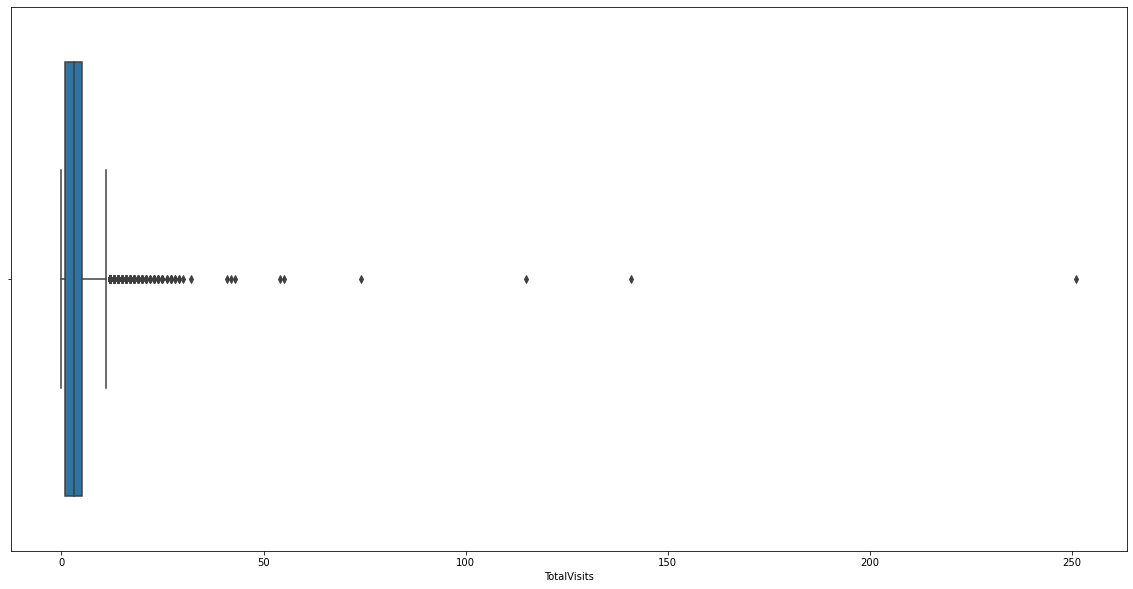

In [31]:
# Checking if the "TotalVisits" has any outliers through boxplot
plt.figure(figsize =(20,10))
sns.boxplot(lead_score['TotalVisits'])
plt.show()

### There are number of outliers in 'Total Visits'

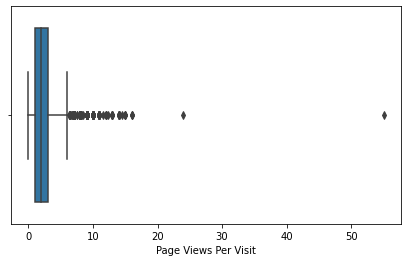

In [32]:
# Checking if the "Page Views Per Visit" has any outliers through boxplot
plt.figure(figsize =(7,4))
sns.boxplot(lead_score['Page Views Per Visit'])
plt.show()

### There are number of outliers in 'Page Views Per Visit'

# 3. Creating dummies for categorical columns

In [33]:
# Create dummy variables using the 'get_dummies' command
dummy=pd.get_dummies(lead_score[['Lead Origin', 'Lead Source','Specialization','What is your current occupation','City']], drop_first = True)

# Add the results to the master dataframe
lead_score = pd.concat([lead_score, dummy], axis = 1)

In [34]:
# Since we have created dummies for categorical columns, we can now drop the original columns for which 
# we have created the dummies

lead_score = lead_score.drop(['Lead Origin', 'Lead Source','Specialization','What is your current occupation','City'],1)

In [35]:
# Check the resulting data frame

lead_score.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_other,Lead Source_unknown,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_other,Specialization_unknown,What is your current occupation_other,What is your current occupation_unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown
0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [36]:
# Checking no. of rows and columns
lead_score.shape

(9103, 30)

# 4. Train-Test Split

In [37]:
# Store all the feature variables in x and target variable in Y

X = lead_score.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_other,Lead Source_unknown,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_other,Specialization_unknown,What is your current occupation_other,What is your current occupation_unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown
0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [38]:
y = lead_score['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [39]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# 5. Scaling and Standardizing Data

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_other,Lead Source_unknown,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_other,Specialization_unknown,What is your current occupation_other,What is your current occupation_unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown
7962,-0.092900,1.476324,-0.394072,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5520,0.695064,-0.771066,2.111481,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1962,0.301082,-0.571257,0.061483,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1566,2.074000,1.393834,0.517039,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
9170,-0.683873,-0.881052,-1.077404,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [42]:
### Checking the Conversion Rate
converted = (sum(lead_score['Converted'])/len(lead_score['Converted'].index))*100
converted

38.02043282434362

### We have almost 38% conversion rate

## Now the numeric variables has been standardized and created dummies for the categorical variables


# 6 Modelling

### Let's start by splitting the data into training set and test set

In [43]:
import statsmodels.api as sm

In [44]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2918.4
Date:                Sun, 06 Dec 2020   Deviance:                       5836.8
Time:                        19:08:59   Pearson chi2:                 6.43e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.0271      0.223     -0.121      0.903      -0.465       0.411
TotalVisits                                  0.1237      0.048      2.600      0.009       0.030       0.217
Total Time Spent on Website                  1.0800      0.038     28.373      0.000       1.005       1.155
Page Views Per Visit                        -0.0392      0.046     -0.861      0.389      -0.128       0.050
Lead Origin_Landing Page Submission         -0.7320      0.138     -5.287      0.000      -1.003      -0.461
Lead Origin_Lead Add Form                    5.5002      0.604      9.113      0.000       4.317       6.683
Lead Origin_Lead Import                      0.9860      0.547      1.802      0.072      -0.087       2.058
Lead Source_Google                           0.3332      0.090      3.705      0.000       0.157       0.510
Lead Source_Olark Chat                       1.1846      0.143      8.294      0.000       0.905       1.464
Lead Source_Organic Search                   0.2325      0.117      1.989      0.047       0.003       0.462
Lead Source_Reference                       -1.7489      0.643     -2.722      0.006      -3.008      -0.490
Lead Source_other                           -0.0876      0.302     -0.290      0.772      -0.680       0.505
Lead Source_unknown                          0.4985      1.461      0.341      0.733      -2.365       3.362
Specialization_Business Administration      -0.2323      0.229     -1.013      0.311      -0.682       0.217
Specialization_Finance Management           -0.2399      0.191     -1.254      0.210      -0.615       0.135
Specialization_Human Resource Management    -0.2649      0.194     -1.363      0.173      -0.646       0.116
Specialization_IT Projects Management       -0.2110      0.228     -0.924      0.355      -0.658       0.236
Specialization_Marketing Management         -0.1703      0.195     -0.875      0.382      -0.552       0.211
Specialization_Operations Management        -0.1667      0.214     -0.780      0.436      -0.586       0.252
Specialization_Supply Chain Management      -0.2332      0.227     -1.026      0.305      -0.679       0.212
Specialization_other                        -0.3372      0.187     -1.800      0.072      -0.705       0.030
Specialization_unknown                      -1.0200      0.213     -4.793      0.000      -1.437      -0.603
What is your current occupation_other        1.4547      0.119     12.264      0.000       1.222       1.687
What is your current occupation_unknown     -1.2302      0.084    -14.618      0.000      -1.395      -1.065
City_Other Cities                           -0.1121      0.129     -0.868      0.385      -0.365       0.141
City_Other Cities of Maharashtr

## Feature selection using RFE

In [45]:
# Create logistic regression object and run RFE with 15 variables

logreg = LogisticRegression()
rfe = RFE(logreg, 15)       
rfe = rfe.fit(X_train, y_train)

In [46]:
rfe.support_

array([False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
        True,  True])

In [47]:
# Let's take a look at the features which have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 12),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 13),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_other', True, 1),
 ('Lead Source_unknown', True, 1),
 ('Specialization_Business Administration', False, 7),
 ('Specialization_Finance Management', False, 6),
 ('Specialization_Human Resource Management', False, 5),
 ('Specialization_IT Projects Management', False, 8),
 ('Specialization_Marketing Management', False, 10),
 ('Specialization_Operations Management', False, 11),
 ('Specialization_Supply Chain Management', False, 9),
 ('Specialization_other', False, 4),
 ('Specialization_unknown', True, 1),
 ('What is your current occupation_other', True, 1),
 ('What is your current occupation

In [48]:
# Store all the columns selected by RFE in the variable 'col_rfe'

col_rfe = X_train.columns[rfe.support_]

In [49]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management',
       'Specialization_Supply Chain Management', 'Specialization_other',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts'],
      dtype='object')

### Let's build the model using the features selected by RFE

In [50]:
# Adding a constant and fitting the train data into logistic regression

X_train = X_train[col_rfe]

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2926.7
Date:                Sun, 06 Dec 2020   Deviance:                       5853.4
Time:                        19:09:02   Pearson chi2:                 6.42e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.2367      0.152     -1.556      0.120      -0.535       0.062
Total Time Spent on Website                 1.0817      0.038     28.503      0.000       1.007       1.156
Lead Origin_Landing Page Submission        -0.7344      0.137     -5.348      0.000      -1.004      -0.465
Lead Origin_Lead Add Form                   5.3707      0.597      8.991      0.000       4.200       6.541
Lead Origin_Lead Import                     0.8136      0.538      1.513      0.130      -0.240       1.867
Lead Source_Google                          0.3337      0.088      3.786      0.000       0.161       0.506
Lead Source_Olark Chat                      1.1457      0.139      8.236      0.000       0.873       1.418
Lead Source_Organic Search                  0.2316      0.111      2.077      0.038       0.013       0.450
Lead Source_Reference                      -1.6585      0.640     -2.592      0.010      -2.913      -0.404
Lead Source_other                          -0.0032      0.297     -0.011      0.991      -0.585       0.579
Lead Source_unknown                         0.6046      1.469      0.412      0.681      -2.274       3.483
Specialization_unknown                     -0.7957      0.139     -5.742      0.000      -1.067      -0.524
What is your current occupation_other       1.4490      0.118     12.243      0.000       1.217       1.681
What is your current occupation_unknown    -1.2302      0.084    -14.651      0.000      -1.395      -1.066
City_Tier II Cities                        -0.4256      0.379     -1.123      0.261      -1.168       0.317
City_unknown                               -0.2330      0.154     -1.517      0.129      -0.534       0.068
===========================================================================================================
"""

In [51]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.723045
5520    0.115248
1962    0.113947
1566    0.910467
9170    0.254877
5097    0.090881
8954    0.239256
309     0.255605
5519    0.090881
1050    0.638527
dtype: float64

In [52]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.72304473, 0.11524799, 0.11394744, 0.91046691, 0.25487725,
       0.0908815 , 0.23925598, 0.25560509, 0.0908815 , 0.63852659])

### Creating a dataframe with the actual converted flag and the predicted probabilities

In [53]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.723045,7962
1,0,0.115248,5520
2,0,0.113947,1962
3,1,0.910467,1566
4,0,0.254877,9170


### Creating new column 'predicted' with 1 if Converted_Prob > 0.35 else 0

In [54]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.723045,7962,1
1,0,0.115248,5520,0
2,0,0.113947,1962,0
3,1,0.910467,1566,1
4,0,0.254877,9170,0


-  . There are some variables where p value is greater than 0.05
-  . Let's calculate VIF for further analysis

## Checking VIFs

In [55]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train[col_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_rfe].values, i) for i in range(X_train[col_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,8.17
14,City_unknown,7.25
7,Lead Source_Reference,7.02
10,Specialization_unknown,6.55
8,Lead Source_other,2.40
5,Lead Source_Olark Chat,2.39
1,Lead Origin_Landing Page Submission,1.89
4,Lead Source_Google,1.87
12,What is your current occupation_unknown,1.61
6,Lead Source_Organic Search,1.37


### Since City_unknown has high P -value of 0.135 which is greater than 0.05 as well as high VIF value of 6.99 which is also higher than 5, so let's drop this variable

In [57]:
col_rfe=col_rfe.drop('City_unknown',1)
col_rfe

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_other', 'Lead Source_unknown', 'Specialization_unknown',
       'What is your current occupation_other',
       'What is your current occupation_unknown', 'City_Tier II Cities'],
      dtype='object')

In [58]:
# Let's re-run the model using the selected variables

X_train = X_train[col_rfe]

X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2927.8
Date:                Sun, 06 Dec 2020   Deviance:                       5855.7
Time:                        19:09:03   Pearson chi2:                 6.43e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.3303      0.139     -2.380      0.017      -0.602      -0.058
Total Time Spent on Website                 1.0822      0.038     28.525      0.000       1.008       1.157
Lead Origin_Landing Page Submission        -0.6417      0.123     -5.232      0.000      -0.882      -0.401
Lead Origin_Lead Add Form                   5.3820      0.598      9.001      0.000       4.210       6.554
Lead Origin_Lead Import                     0.9532      0.532      1.792      0.073      -0.089       1.996
Lead Source_Google                          0.3359      0.088      3.812      0.000       0.163       0.509
Lead Source_Olark Chat                      1.1400      0.139      8.204      0.000       0.868       1.412
Lead Source_Organic Search                  0.2276      0.111      2.042      0.041       0.009       0.446
Lead Source_Reference                      -1.6669      0.640     -2.602      0.009      -2.922      -0.412
Lead Source_other                          -0.0083      0.297     -0.028      0.978      -0.590       0.573
Lead Source_unknown                         0.5269      1.441      0.366      0.715      -2.298       3.352
Specialization_unknown                     -0.9204      0.112     -8.187      0.000      -1.141      -0.700
What is your current occupation_other       1.4387      0.119     12.135      0.000       1.206       1.671
What is your current occupation_unknown    -1.2325      0.084    -14.686      0.000      -1.397      -1.068
City_Tier II Cities                        -0.4220      0.379     -1.114      0.265      -1.164       0.320
===========================================================================================================
"""

In [59]:
# Make a VIF dataframe once again

vif = pd.DataFrame()
vif['Features'] = X_train[col_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_rfe].values, i) for i in range(X_train[col_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,8.17
7,Lead Source_Reference,6.93
10,Specialization_unknown,2.78
8,Lead Source_other,2.39
5,Lead Source_Olark Chat,2.21
1,Lead Origin_Landing Page Submission,1.81
4,Lead Source_Google,1.78
12,What is your current occupation_unknown,1.60
6,Lead Source_Organic Search,1.32
9,Lead Source_unknown,1.31


#### There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'Lead Source_Reference' has the high VIF and P value. So let's start by dropping that.

In [60]:
col_rfe = col_rfe.drop('Lead Source_Reference', 1)
col_rfe

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_other',
       'Lead Source_unknown', 'Specialization_unknown',
       'What is your current occupation_other',
       'What is your current occupation_unknown', 'City_Tier II Cities'],
      dtype='object')

In [61]:
# Let's re-run the model using the selected variables

X_train = X_train[col_rfe]

X_train_sm = sm.add_constant(X_train)
logm4= sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2932.0
Date:                Sun, 06 Dec 2020   Deviance:                       5863.9
Time:                        19:09:03   Pearson chi2:                 6.32e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.3914      0.137     -2.855      0.004      -0.660      -0.123
Total Time Spent on Website                 1.0837      0.038     28.550      0.000       1.009       1.158
Lead Origin_Landing Page Submission        -0.5995      0.122     -4.928      0.000      -0.838      -0.361
Lead Origin_Lead Add Form                   4.0512      0.236     17.201      0.000       3.590       4.513
Lead Origin_Lead Import                     0.5477      0.503      1.090      0.276      -0.437       1.533
Lead Source_Google                          0.3659      0.088      4.179      0.000       0.194       0.537
Lead Source_Olark Chat                      1.1884      0.138      8.611      0.000       0.918       1.459
Lead Source_Organic Search                  0.2570      0.111      2.315      0.021       0.039       0.475
Lead Source_other                           0.4261      0.234      1.822      0.068      -0.032       0.884
Lead Source_unknown                         1.5451      1.225      1.261      0.207      -0.857       3.947
Specialization_unknown                     -0.9005      0.113     -8.002      0.000      -1.121      -0.680
What is your current occupation_other       1.4356      0.119     12.084      0.000       1.203       1.668
What is your current occupation_unknown    -1.2381      0.084    -14.757      0.000      -1.403      -1.074
City_Tier II Cities                        -0.4146      0.379     -1.093      0.274      -1.158       0.329
===========================================================================================================
"""

In [62]:
# Make a VIF dataframe once again

vif = pd.DataFrame()
vif['Features'] = X_train[col_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_rfe].values, i) for i in range(X_train[col_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_unknown,2.78
5,Lead Source_Olark Chat,2.20
1,Lead Origin_Landing Page Submission,1.81
4,Lead Source_Google,1.78
11,What is your current occupation_unknown,1.59
7,Lead Source_other,1.41
2,Lead Origin_Lead Add Form,1.35
6,Lead Source_Organic Search,1.31
0,Total Time Spent on Website,1.28
10,What is your current occupation_other,1.18


### Since 'Lead Origin_Lead Import' has higher P value of 0.276, let's drop it

In [63]:
col_rfe = col_rfe.drop('Lead Origin_Lead Import', 1)
col_rfe

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_other', 'Lead Source_unknown', 'Specialization_unknown',
       'What is your current occupation_other',
       'What is your current occupation_unknown', 'City_Tier II Cities'],
      dtype='object')

In [64]:
# Let's re-run the model using the selected variables

X_train = X_train[col_rfe]

X_train_sm = sm.add_constant(X_train)
logm5= sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2932.5
Date:                Sun, 06 Dec 2020   Deviance:                       5865.1
Time:                        19:09:04   Pearson chi2:                 6.31e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.3673      0.135     -2.714      0.007      -0.632      -0.102
Total Time Spent on Website                 1.0804      0.038     28.577      0.000       1.006       1.155
Lead Origin_Landing Page Submission        -0.6199      0.120     -5.154      0.000      -0.856      -0.384
Lead Origin_Lead Add Form                   4.0011      0.230     17.400      0.000       3.550       4.452
Lead Source_Google                          0.3607      0.087      4.128      0.000       0.189       0.532
Lead Source_Olark Chat                      1.1752      0.137      8.554      0.000       0.906       1.445
Lead Source_Organic Search                  0.2520      0.111      2.273      0.023       0.035       0.469
Lead Source_other                           0.5244      0.214      2.445      0.014       0.104       0.945
Lead Source_unknown                         1.7695      1.287      1.375      0.169      -0.752       4.291
Specialization_unknown                     -0.9167      0.112     -8.211      0.000      -1.136      -0.698
What is your current occupation_other       1.4353      0.119     12.084      0.000       1.203       1.668
What is your current occupation_unknown    -1.2398      0.084    -14.785      0.000      -1.404      -1.075
City_Tier II Cities                        -0.4144      0.379     -1.094      0.274      -1.157       0.328
===========================================================================================================
"""

In [65]:
# Make a VIF dataframe once again

vif = pd.DataFrame()
vif['Features'] = X_train[col_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_rfe].values, i) for i in range(X_train[col_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Specialization_unknown,2.78
4,Lead Source_Olark Chat,2.20
1,Lead Origin_Landing Page Submission,1.81
3,Lead Source_Google,1.78
10,What is your current occupation_unknown,1.59
2,Lead Origin_Lead Add Form,1.32
5,Lead Source_Organic Search,1.31
0,Total Time Spent on Website,1.28
6,Lead Source_other,1.24
9,What is your current occupation_other,1.18


### Since 'City_Tier II Cities' has higher P value of 0.274, let's drop it

In [66]:
col_rfe = col_rfe.drop('City_Tier II Cities', 1)
col_rfe

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_other', 'Lead Source_unknown', 'Specialization_unknown',
       'What is your current occupation_other',
       'What is your current occupation_unknown'],
      dtype='object')

In [67]:
# Let's re-run the model using the selected variables

X_train = X_train[col_rfe]

X_train_sm = sm.add_constant(X_train)
logm6= sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2933.2
Date:                Sun, 06 Dec 2020   Deviance:                       5866.3
Time:                        19:09:04   Pearson chi2:                 6.31e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.3710      0.135     -2.743      0.006      -0.636      -0.106
Total Time Spent on Website                 1.0804      0.038     28.583      0.000       1.006       1.154
Lead Origin_Landing Page Submission        -0.6234      0.120     -5.185      0.000      -0.859      -0.388
Lead Origin_Lead Add Form                   4.0027      0.230     17.409      0.000       3.552       4.453
Lead Source_Google                          0.3658      0.087      4.192      0.000       0.195       0.537
Lead Source_Olark Chat                      1.1783      0.137      8.578      0.000       0.909       1.447
Lead Source_Organic Search                  0.2507      0.111      2.262      0.024       0.033       0.468
Lead Source_other                           0.5277      0.214      2.460      0.014       0.107       0.948
Lead Source_unknown                         1.7712      1.287      1.376      0.169      -0.751       4.294
Specialization_unknown                     -0.9156      0.112     -8.200      0.000      -1.134      -0.697
What is your current occupation_other       1.4354      0.119     12.083      0.000       1.203       1.668
What is your current occupation_unknown    -1.2404      0.084    -14.793      0.000      -1.405      -1.076
===========================================================================================================
"""

In [68]:
# Make a VIF dataframe once again

vif = pd.DataFrame()
vif['Features'] = X_train[col_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_rfe].values, i) for i in range(X_train[col_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Specialization_unknown,2.78
4,Lead Source_Olark Chat,2.20
1,Lead Origin_Landing Page Submission,1.79
3,Lead Source_Google,1.77
10,What is your current occupation_unknown,1.59
2,Lead Origin_Lead Add Form,1.32
5,Lead Source_Organic Search,1.31
0,Total Time Spent on Website,1.28
6,Lead Source_other,1.24
9,What is your current occupation_other,1.18


### Since 'Lead Source_unknown' has higher P value of 0.169, let's drop it

In [69]:
col_rfe = col_rfe.drop('Lead Source_unknown', 1)
col_rfe

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_other', 'Specialization_unknown',
       'What is your current occupation_other',
       'What is your current occupation_unknown'],
      dtype='object')

In [70]:
# Let's re-run the model using the selected variables

X_train = X_train[col_rfe]

X_train_sm = sm.add_constant(X_train)
logm7= sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6361
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2934.5
Date:                Sun, 06 Dec 2020   Deviance:                       5868.9
Time:                        19:09:04   Pearson chi2:                 6.33e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.3689      0.135     -2.725      0.006      -0.634      -0.104
Total Time Spent on Website                 1.0796      0.038     28.571      0.000       1.006       1.154
Lead Origin_Landing Page Submission        -0.6228      0.120     -5.177      0.000      -0.859      -0.387
Lead Origin_Lead Add Form                   4.0647      0.229     17.764      0.000       3.616       4.513
Lead Source_Google                          0.3621      0.087      4.150      0.000       0.191       0.533
Lead Source_Olark Chat                      1.1705      0.137      8.526      0.000       0.901       1.440
Lead Source_Organic Search                  0.2467      0.111      2.227      0.026       0.030       0.464
Lead Source_other                           0.5034      0.215      2.340      0.019       0.082       0.925
Specialization_unknown                     -0.9089      0.112     -8.141      0.000      -1.128      -0.690
What is your current occupation_other       1.4338      0.119     12.070      0.000       1.201       1.667
What is your current occupation_unknown    -1.2412      0.084    -14.804      0.000      -1.406      -1.077
===========================================================================================================
"""

In [71]:
# Make a VIF dataframe once again

vif = pd.DataFrame()
vif['Features'] = X_train[col_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_rfe].values, i) for i in range(X_train[col_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Specialization_unknown,2.76
4,Lead Source_Olark Chat,2.20
1,Lead Origin_Landing Page Submission,1.79
3,Lead Source_Google,1.77
9,What is your current occupation_unknown,1.59
5,Lead Source_Organic Search,1.31
0,Total Time Spent on Website,1.28
2,Lead Origin_Lead Add Form,1.28
6,Lead Source_other,1.23
8,What is your current occupation_other,1.18


### Looking at the P value and the VIF value for the available features, it is good to go with model

## 7. Model Evaluation

## Residual Analysis of the train data

In [72]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]


7962    0.723958
5520    0.138933
1962    0.103836
1566    0.909611
9170    0.257600
5097    0.091148
8954    0.235585
309     0.257242
5519    0.091148
1050    0.639758
dtype: float64

In [73]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.72395822, 0.13893339, 0.10383625, 0.90961149, 0.25759986,
       0.09114781, 0.23558498, 0.25724227, 0.09114781, 0.63975832])

In [74]:
y_train_pred_final['Converted_Prob'] = y_train_pred

### Create with new column 'Predicted' with 1 if Conversion_Prob >0.35 else 0

In [75]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.723958,7962,1
1,0,0.138933,5520,0
2,0,0.103836,1962,0
3,1,0.909611,1566,1
4,0,0.257600,9170,0


In [76]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7900188323917138


### Let's now run the VIF once again



In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train[col_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_rfe].values, i) for i in range(X_train[col_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Specialization_unknown,2.76
4,Lead Source_Olark Chat,2.20
1,Lead Origin_Landing Page Submission,1.79
3,Lead Source_Google,1.77
9,What is your current occupation_unknown,1.59
5,Lead Source_Organic Search,1.31
0,Total Time Spent on Website,1.28
2,Lead Origin_Lead Add Form,1.28
6,Lead Source_other,1.23
8,What is your current occupation_other,1.18


In [78]:
# Create Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3217  736]
 [ 602 1817]]


In [79]:
# Let's evaluate the other metrics

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [80]:
# Calculate the sensitivity
TP/(TP+FN)

0.7511368334022324

In [81]:
# Calculate the specificity
TN/(TN+FP)

0.8138122944599039

# Plotting the ROC Curve

In [82]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [83]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

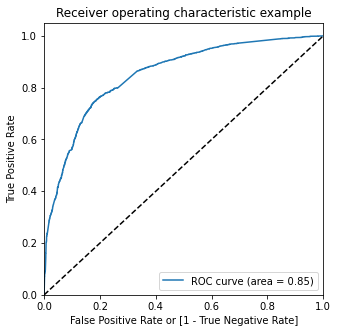

In [84]:
# Call the ROC function tp plot ROC curve

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)


### The area under the Curve is 0.85 which indicates that our model is quite good. Let's find the cut-off value

In [85]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.723958,7962,1,1,1,1,1,1,1,1,1,0,0
1,0,0.138933,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.103836,1962,0,1,1,0,0,0,0,0,0,0,0
3,1,0.909611,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.257600,9170,0,1,1,1,0,0,0,0,0,0,0


In [86]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.565913  0.970236  0.318492
0.2   0.2  0.688010  0.905333  0.555022
0.3   0.3  0.779818  0.778834  0.780420
0.4   0.4  0.791745  0.723853  0.833291
0.5   0.5  0.787822  0.638694  0.879079
0.6   0.6  0.774325  0.551054  0.910954
0.7   0.7  0.754237  0.449359  0.940804
0.8   0.8  0.726616  0.325754  0.971920
0.9   0.9  0.694444  0.208351  0.991905


<Figure size 1440x720 with 0 Axes>

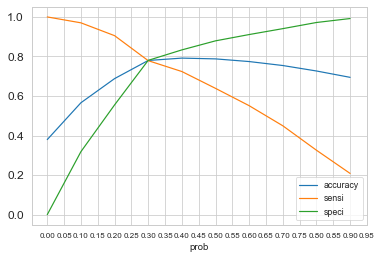

In [87]:
# Let's plot accuracy, sensitivity and specificity for various probabilities.

plt.figure(figsize = (20,10))
sns.set_style("whitegrid")
sns.set_context('paper')
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step = 0.05), size = 8)
plt.yticks(size=12)
plt.show()

## . Based on the ROC curve, let's choose 30% as our optimal cut-off value

In [88]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.30 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.723958,7962,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.138933,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.103836,1962,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.909611,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.257600,9170,0,1,1,1,0,0,0,0,0,0,0,0


In [89]:
# Let's check the accuracy after cut-off
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7798179535467671

In [90]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3085,  868],
       [ 535, 1884]], dtype=int64)

In [91]:
# Let's evaluate the other metrics again after cut-off

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [92]:
# Calculate Sensitivity
TP/(TP+FN)

0.7788342290202563

In [93]:
# Calculate Specificity
TN/(TN+FP)

0.7804199342271693

In [94]:
# Precision Score - TP/TP +FP
P1 =confusion[1,1]/(confusion[0,1]+confusion[1,1])
print(P1)

0.7117117117117117


In [95]:
# Recall - TP / TP + FN
R1=confusion[1,1]/(confusion[1,0]+confusion[1,1])
print(R1)

0.7511368334022324


In [96]:
# Taking out F1 score to find the Harmonic mean of both Precisison and Recall

F = 2*(P1*R1)/(P1+R1)
print(F)

0.7308930008045053


#### Precision and Recall trade-off

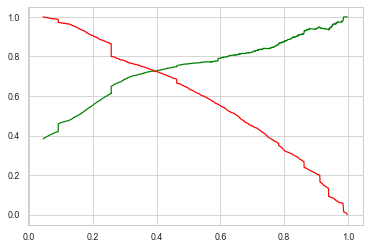

In [97]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Let's go with this Cut-off

# Making predictions on Test Dataset

In [98]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [99]:
# Select the columns in X_train for X_test as well

X_test = X_test[col_rfe]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_other,Specialization_unknown,What is your current occupation_other,What is your current occupation_unknown
3504,-0.103815,1,0,0,0,1,0,0,0,0
4050,-0.881052,0,1,0,0,0,0,0,0,0
7201,0.424120,1,0,0,0,0,0,0,0,0
1196,-0.105648,1,0,0,0,1,0,0,0,0
8219,-0.428274,1,0,0,0,0,0,0,0,0


In [100]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col_rfe])

In [101]:
X_test_sm.head()

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_other,Specialization_unknown,What is your current occupation_other,What is your current occupation_unknown
3504,1.0,-0.103815,1,0,0,0,1,0,0,0,0
4050,1.0,-0.881052,0,1,0,0,0,0,0,0,0
7201,1.0,0.424120,1,0,0,0,0,0,0,0,0
1196,1.0,-0.105648,1,0,0,0,1,0,0,0,0
8219,1.0,-0.428274,1,0,0,0,0,0,0,0,0


In [102]:
X_test_sm = sm.add_constant(X_test)

In [103]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3504    0.297942
4050    0.939607
7201    0.369617
1196    0.297528
8219    0.189371
8747    0.091148
9048    0.551833
6524    0.224359
7693    0.160838
8187    0.862435
dtype: float64

In [104]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3504,0.297942
4050,0.939607
7201,0.369617
1196,0.297528
8219,0.189371


In [105]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [106]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [107]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,0,0.297942
1,1,0.939607
2,0,0.369617
3,0,0.297528
4,1,0.189371


In [108]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,Converted_Prob
0,0,0.297942
1,1,0.939607
2,0,0.369617
3,0,0.297528
4,1,0.189371


In [109]:
# Make predictions on the test set using 0.30 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.30 else 0)
y_pred_final.head()

,Converted,Converted_Prob,final_predicted
0,0,0.297942,0
1,1,0.939607,1
2,0,0.369617,1
3,0,0.297528,0
4,1,0.189371,0


In [110]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.782497253753204

In [111]:
confusion3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion3

array([[1329,  360],
       [ 234,  808]], dtype=int64)

In [112]:
# Let's evaluate the other metrics again after cut-off

TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [113]:
# Calculate Sensitivity
TP/(TP+FN)

0.7754318618042226